## Домашнее задание к лекции «Задачи классификации и кластеризации»

### Задание.

- Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
- Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
- Разделите данные на выборку для обучения и тестирования
- Постройте модель LDA
- Визуализируйте предсказания для тестовой выборки и центры классов
- Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
- Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [6]:
'''
- Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
- Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
- Разделите данные на выборку для обучения и тестирования
- Постройте модель LDA
'''

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target
data.drop(["petal length (cm)","petal width (cm)"],axis=1,inplace=True)
data["variety"] = data_class
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.15)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
print(result)

     sepal length (cm)  sepal width (cm)  variety
105                7.6               3.0        2
4                  5.0               3.6        0
73                 6.1               2.8        1
145                6.7               3.0        2
51                 6.4               3.2        1
85                 6.0               3.4        1
14                 5.8               4.0        0
20                 5.4               3.4        0
13                 4.3               3.0        0
17                 5.1               3.5        0
112                6.8               3.0        2
117                7.7               3.8        2
131                7.9               3.8        2
132                6.4               2.8        2
53                 5.5               2.3        1
39                 5.1               3.4        0
43                 5.0               3.5        0
32                 5.2               4.1        0
21                 5.1               3.7        0


In [36]:
accuracy_score(y_test, lda.predict(X_test))

0.782608695652174

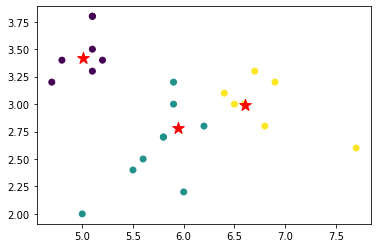

In [37]:
'''
- Визуализируйте предсказания для тестовой выборки и центры классов
'''
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(X_train, y_train)

plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda.predict(X_test))

plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')
plt.show()

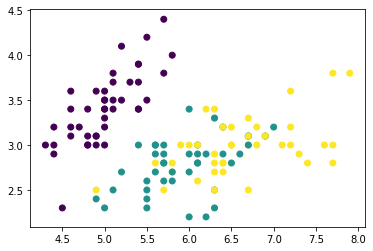

In [38]:

plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [57]:
'''
- Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
- Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию
'''
#data.drop(["variety"],axis=1,inplace=True)
X_train, X_test= train_test_split(data, test_size=0.15)
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X_train)


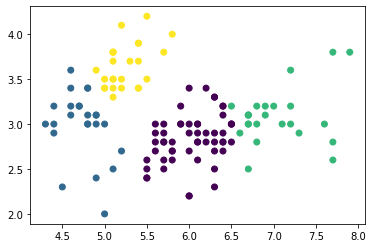

In [58]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=clusters)

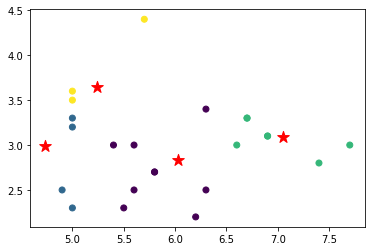

In [61]:
clusters = kmeans.predict(X_test)
centers_ = kmeans.cluster_centers_
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=clusters)
plt.scatter(centers_[:, 0], centers_[:, 1], c='r', s=150, marker='*')
